activation function &phi;

or in Latex
$ \phi $

In [3]:
import numpy as np

In [4]:
#verfication program
import tensorflow as tf
tf.__version__

'2.1.0'

In [5]:
#setting the backend
import os
os.environ['KERAS_BACKEND'] ='tensorflow'# 'theano'#

#from importlib import reload
#reload(keras)
import keras

In [6]:
keras.__version__

'2.3.1'

In [7]:
#at least this works as documented
from keras import backend as kbe #to work with backend directly
data = kbe.variable(np.random.random((4,2)))#4x2 random tensor
zero_data = kbe.zeros_like(data)#4x2 tesnor of zeroes
print(kbe.eval(zero_data))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


# section 03 optimal separation of 2 clusters of data
simple-blobs.py

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [13]:
# helper functions
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
    
#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt


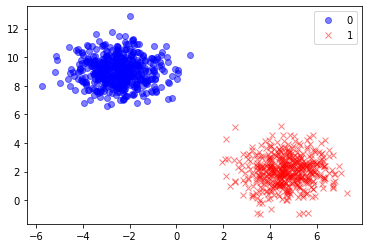

In [17]:
# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

pl = plot_data(plt, X, y)
pl.show()
#data that can be divided by a line should not require hidden layers

In [9]:
# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam #optimizer - backprop

In [19]:
#   Simple Sequential model
model = Sequential()
#   Add a Dense Fully Connected Layer with 1 neuron.  Using input_shape = (2,) says the input will 
#       be arrays of the form (*,2).  The first dimension will be an unspecified 
#       number of batches (rows) of data.  The second dimension is 2 which are the X, Y positions of each data element.
#       The sigmoid activation function is used to return 0 or 1, signifying the data 
#       cluster the position is predicted to belong to.
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))#single neuron
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
%time model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

Wall time: 25.9 ms


In [20]:
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
%time model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
700/700 [==============================] - 0s 117us/step - loss: 0.2247 - accuracy: 0.8900
Epoch 2/100
700/700 [==============================] - 0s 24us/step - loss: 0.0212 - accuracy: 1.0000
Epoch 3/100
700/700 [==============================] - 0s 24us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 26us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 24us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 23us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 26us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 24us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 27us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 26us/step - loss: 0.00

700/700 [==============================] - 0s 19us/step - loss: 2.5626e-04 - accuracy: 1.0000
Epoch 79/100
700/700 [==============================] - 0s 20us/step - loss: 2.5041e-04 - accuracy: 1.0000
Epoch 80/100
700/700 [==============================] - 0s 20us/step - loss: 2.4675e-04 - accuracy: 1.0000
Epoch 81/100
700/700 [==============================] - 0s 20us/step - loss: 2.4200e-04 - accuracy: 1.0000
Epoch 82/100
700/700 [==============================] - 0s 20us/step - loss: 2.3745e-04 - accuracy: 1.0000
Epoch 83/100
700/700 [==============================] - 0s 21us/step - loss: 2.3296e-04 - accuracy: 1.0000
Epoch 84/100
700/700 [==============================] - 0s 21us/step - loss: 2.2894e-04 - accuracy: 1.0000
Epoch 85/100
700/700 [==============================] - 0s 21us/step - loss: 2.2524e-04 - accuracy: 1.0000
Epoch 86/100
700/700 [==============================] - 0s 20us/step - loss: 2.2093e-04 - accuracy: 1.0000
Epoch 87/100
700/700 [============================

300/300 [==============================] - 0s 50us/step


Test loss: 4.424381242036664e-05 Test accuracy: 1.0


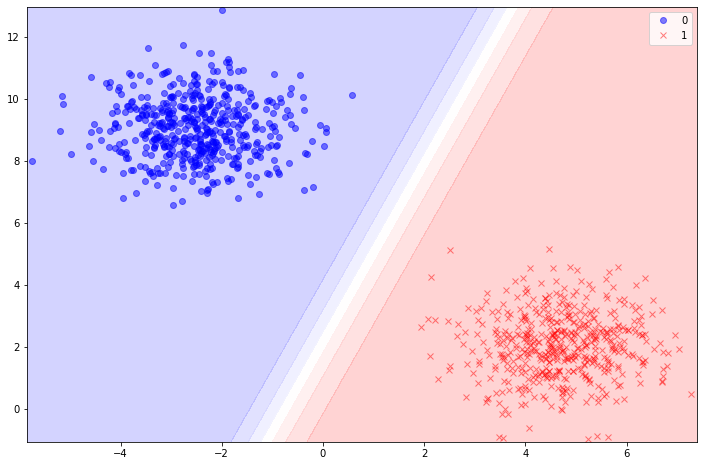

In [21]:
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()

# a more complex model 
deep-circles.py

In [11]:
#   deep_circles.py
#   Defines a network that can find separate circles of data
#

#   Imports
from sklearn.datasets import make_circles
#import numpy as np
#import matplotlib.pyplot as plt
#import os
#os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

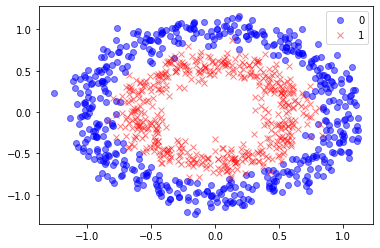

In [14]:

X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)
pl = plot_data(plt, X, y)
pl.show()

In [17]:
# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# originally started with single layer and later modified to increase accuracy
#  adding several dense layers this time
model = Sequential()
#model.add(Dense(4, input_shape=(2,), activation="tanh", name="Hidden-1"))
#model.add(Dense(4, activation="tanh", name="Hidden-2"))
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))#single neuron
model.summary()
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
%time model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

#visualization requires pydot install (dep: graphviz)
from keras.utils import plot_model
plot_model(model, to_file="k03_model.png", show_shapes=True, show_layer_names=True)

#   Define early stopping callback
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Wall time: 24 ms


### output from keras.utils.plot_model
<img src='k03_model_orig.png'>

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 142us/step - loss: 0.7126 - accuracy: 0.5200 - val_loss: 0.6996 - val_accuracy: 0.4867
Epoch 2/100
700/700 [==============================] - 0s 30us/step - loss: 0.6934 - accuracy: 0.5371 - val_loss: 0.6943 - val_accuracy: 0.4967
Epoch 3/100
700/700 [==============================] - 0s 33us/step - loss: 0.6954 - accuracy: 0.4614 - val_loss: 0.6960 - val_accuracy: 0.4800
Epoch 4/100
700/700 [==============================] - 0s 30us/step - loss: 0.6956 - accuracy: 0.4914 - val_loss: 0.6973 - val_accuracy: 0.5167
Epoch 5/100
700/700 [==============================] - 0s 36us/step - loss: 0.6957 - accuracy: 0.5243 - val_loss: 0.6959 - val_accuracy: 0.5033
Epoch 6/100
700/700 [==============================] - 0s 31us/step - loss: 0.6961 - accuracy: 0.5086 - val_loss: 0.6960 - val_accuracy: 0.5333
Epoch 7/100
700/700 [==============================] - 0s 34us/step - loss: 0.6939 - accu

C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\tf37\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


700/700 [==============================] - 0s 29us/step - loss: 0.6950 - accuracy: 0.5157 - val_loss: 0.6936 - val_accuracy: 0.5100
Epoch 10/100
700/700 [==============================] - 0s 33us/step - loss: 0.6937 - accuracy: 0.5071 - val_loss: 0.6971 - val_accuracy: 0.5100
Epoch 11/100
700/700 [==============================] - 0s 31us/step - loss: 0.6951 - accuracy: 0.4829 - val_loss: 0.6949 - val_accuracy: 0.4800
Epoch 12/100
700/700 [==============================] - 0s 33us/step - loss: 0.6968 - accuracy: 0.4814 - val_loss: 0.6986 - val_accuracy: 0.5967
Epoch 13/100
700/700 [==============================] - 0s 30us/step - loss: 0.6964 - accuracy: 0.5071 - val_loss: 0.6935 - val_accuracy: 0.4933
Epoch 14/100
700/700 [==============================] - 0s 31us/step - loss: 0.6946 - accuracy: 0.5443 - val_loss: 0.6966 - val_accuracy: 0.4900
Epoch 15/100
700/700 [==============================] - 0s 31us/step - loss: 0.6960 - accuracy: 0.4486 - val_loss: 0.6975 - val_accuracy: 0.570

700/700 [==============================] - 0s 33us/step - loss: 0.6954 - accuracy: 0.4871 - val_loss: 0.6947 - val_accuracy: 0.5267
Epoch 66/100
700/700 [==============================] - 0s 34us/step - loss: 0.6950 - accuracy: 0.5314 - val_loss: 0.6974 - val_accuracy: 0.4800
Epoch 67/100
700/700 [==============================] - 0s 33us/step - loss: 0.6952 - accuracy: 0.4643 - val_loss: 0.6942 - val_accuracy: 0.4867
Epoch 68/100
700/700 [==============================] - 0s 34us/step - loss: 0.6957 - accuracy: 0.5286 - val_loss: 0.6974 - val_accuracy: 0.6000
Epoch 69/100
700/700 [==============================] - 0s 31us/step - loss: 0.6947 - accuracy: 0.4957 - val_loss: 0.6961 - val_accuracy: 0.5233
Epoch 70/100
700/700 [==============================] - 0s 34us/step - loss: 0.6939 - accuracy: 0.5229 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 71/100
700/700 [==============================] - 0s 30us/step - loss: 0.6943 - accuracy: 0.4886 - val_loss: 0.6954 - val_accuracy: 0.530

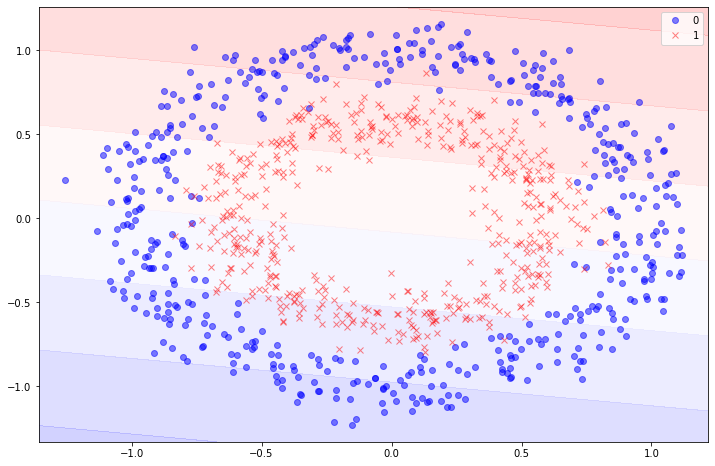

In [20]:
#verbose is set to provide more progress updates
%time model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test))
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()

#FIT IS BAD with 1 layer 1 neuron - not equipped to handle a mapping of this complexity

In [21]:
# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# originally started with single layer and later modified to increase accuracy
#  adding several dense layers this time
model = Sequential()
#first layer must define input size 
model.add(Dense(4, input_shape=(2,), activation="tanh", name="Hidden-1"))
model.add(Dense(4, activation="tanh", name="Hidden-2"))
model.add(Dense(1, activation="sigmoid", name="output_layer"))
model.summary()
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
%time model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

#visualization requires pydot install (dep: graphviz)
from keras.utils import plot_model
plot_model(model, to_file="k03_model.png", show_shapes=True, show_layer_names=True)

#   Define early stopping callback
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Wall time: 23 ms


### output from keras.utils.plot_model
<img src='k03_model.png'>

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 187us/step - loss: 0.6988 - accuracy: 0.5171 - val_loss: 0.6787 - val_accuracy: 0.5900
Epoch 2/100
700/700 [==============================] - 0s 35us/step - loss: 0.6734 - accuracy: 0.5786 - val_loss: 0.6653 - val_accuracy: 0.5733
Epoch 3/100
700/700 [==============================] - 0s 36us/step - loss: 0.6499 - accuracy: 0.6286 - val_loss: 0.6470 - val_accuracy: 0.6333
Epoch 4/100
700/700 [==============================] - 0s 35us/step - loss: 0.6226 - accuracy: 0.6757 - val_loss: 0.6300 - val_accuracy: 0.6433
Epoch 5/100
700/700 [==============================] - 0s 35us/step - loss: 0.6032 - accuracy: 0.6571 - val_loss: 0.6221 - val_accuracy: 0.6200
Epoch 6/100
700/700 [==============================] - 0s 34us/step - loss: 0.5637 - accuracy: 0.7200 - val_loss: 0.5596 - val_accuracy: 0.7033
Epoch 7/100
700/700 [==============================] - 0s 37us/step - loss: 0.4938 - accu

C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\tf37\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 9/100
700/700 [==============================] - 0s 37us/step - loss: 0.2145 - accuracy: 0.9257 - val_loss: 0.2471 - val_accuracy: 0.9233
Epoch 10/100
700/700 [==============================] - 0s 36us/step - loss: 0.1652 - accuracy: 0.9543 - val_loss: 0.2023 - val_accuracy: 0.9133
Epoch 11/100
700/700 [==============================] - 0s 36us/step - loss: 0.1537 - accuracy: 0.9529 - val_loss: 0.2151 - val_accuracy: 0.9233
Epoch 12/100
700/700 [==============================] - 0s 39us/step - loss: 0.1415 - accuracy: 0.9471 - val_loss: 0.1788 - val_accuracy: 0.9400
Epoch 13/100
700/700 [==============================] - 0s 38us/step - loss: 0.0922 - accuracy: 0.9729 - val_loss: 0.1655 - val_accuracy: 0.9400
Epoch 14/100
700/700 [==============================] - 0s 33us/step - loss: 0.0895 - accuracy: 0.9743 - val_loss: 0.1595 - val_accuracy: 0.9367
Epoch 15/100
700/700 [==============================] - 0s 32us/step - loss: 0.1210 - accuracy: 0.9529 - val_loss: 0.1863 - val_acc

700/700 [==============================] - 0s 28us/step - loss: 0.0645 - accuracy: 0.9786 - val_loss: 0.1777 - val_accuracy: 0.9233
Epoch 66/100
700/700 [==============================] - 0s 32us/step - loss: 0.0677 - accuracy: 0.9757 - val_loss: 0.1490 - val_accuracy: 0.9367
Epoch 67/100
700/700 [==============================] - 0s 30us/step - loss: 0.0666 - accuracy: 0.9714 - val_loss: 0.1842 - val_accuracy: 0.9233
Epoch 68/100
700/700 [==============================] - 0s 28us/step - loss: 0.0565 - accuracy: 0.9814 - val_loss: 0.1502 - val_accuracy: 0.9433
Epoch 69/100
700/700 [==============================] - 0s 31us/step - loss: 0.0641 - accuracy: 0.9829 - val_loss: 0.1448 - val_accuracy: 0.9600
Epoch 70/100
700/700 [==============================] - 0s 31us/step - loss: 0.0743 - accuracy: 0.9729 - val_loss: 0.1346 - val_accuracy: 0.9500
Epoch 71/100
700/700 [==============================] - 0s 30us/step - loss: 0.0645 - accuracy: 0.9757 - val_loss: 0.2041 - val_accuracy: 0.933

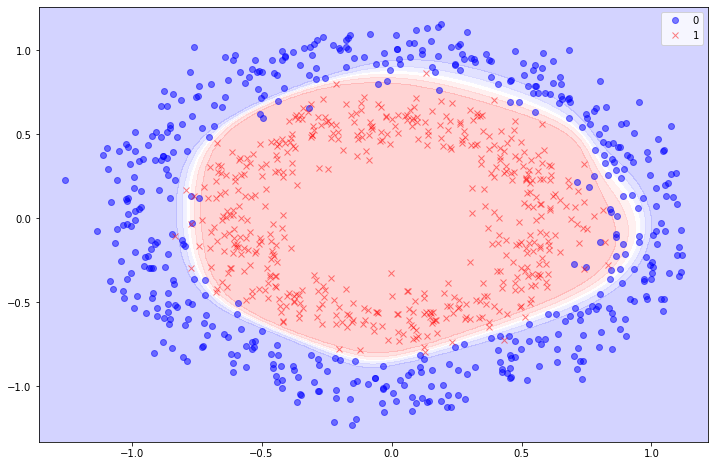

In [22]:
#verbose is set to provide more progress updates
%time model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test))
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()